### Welcome! 

Motivation A - you're 100% guaranteed to use at least some of these tools in 4th year projects (& BME jobs..).

Motivation B - even theory questions of the test are easier to answer when concepts are practiced (so they make sense)

### House rules:

**Pre-requisites**: We assume basic grasp of Algebra, Python, Statistics. We do quick recaps in the first tutorials that should clarify the level; if something is not clear, don't be shy to open old notebooks to get up to speed.

**Tutorial time**: We won't have time to go over all details and to answer all your questions; home time needed. You're kindly asked to quickly read through the tutorial before and, more importantly, RUN & READ it afterwards, make sure you're able to answer (&code) the small riddles we'll plant around. 


### Notebook setup

Please make sure you have a machine with an IDE-based (IDE: Interactive Development Environment, s.a. Visual Studio Code (VSCode)) local setup and also a workable cloud setup (e.g., Google Colab).

Below are steps that work well for me (feel free to explore others on your own)

1. Cloud setup: register in Colab, create a Google Drive folder, upload notebooks there and open them in colab by clicking on them in Google Drive. 
1. Make sure Visual Studio Code (VSCode) and python are installed on the machine; if not download and install using https://www.python.org/downloads/ or https://docs.anaconda.com/free/miniconda/
1. File --> Open Folder --> choose the folder to which you download course's notebooks. Save the workspace.
1. Click a notebook (ipynb) you downloaded into the folder. VScode will guide you through installing python and jupyter plugins.
1. Run first cell. VScode will ask which kernel you want to use. Choose "create new virtual environment in workspace", and use that throughout the course. More generally, virtual environments (venvs) are handy to have different package versions per different projects, avoiding messing with global python install, etc etc. 
1. ```[optional]``` You can also change kernel actively, e.g. to new venv. Click "python" in top right corner --> select another kernel --> python environments --> create python environment --> venv --> create in your folder. 
1. Creation and Publication (e.g., to submit Homework)
    1. Notes: Use Markdown cells (like this one). Don't invest too much time on design, latex formulas, etc.. You can paste screenshots or photos of handnotes easily. 
    1. Export: top-panel --> Export --> as HTML --> open in browser --> print to PDF. 


In [336]:
# Verify our packages are installed in the specific virtualenv in which the notebook is running
%pip install numpy matplotlib pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Python recap: iterators, lists/dicts, comprehensions, multi-dimensional array

In [273]:
for jj in range(3):  
    print(jj)

objects = ( (0,1,2), range(3), list(range(3)) ) 

# TODO: Try same loop iterating over other objects. Is it the same? 
# What's the common part that helps them support "for" loop? (hint: see below)
for obj in objects:
   print(obj, type(obj), hasattr(obj, "__iter__"))

0
1
2
(0, 1, 2) <class 'tuple'> True
range(0, 3) <class 'range'> True
[0, 1, 2] <class 'list'> True


In [274]:
a = [1,2,3]
[0, *a], [0]+a

([0, 1, 2, 3], [0, 1, 2, 3])

In [275]:
display( list(range(3)) ),          # is [range(3)] the same?
display( list(range(1, 7, 2)) )     # why 5 not 7? (inclusive/not inclusive)

display( [1+2*x for x in range(3)] )          # "List Comprehension"
display( {str(x): 1+2*x for x in range(3)} )  # "Dictionary Comprehension"

[0, 1, 2]

[1, 3, 5]

[1, 3, 5]

{'0': 1, '1': 3, '2': 5}

In [276]:
list(enumerate('Hello')), list(zip(range(10, 15), 'Hello')) 
# TODO go back from pairs to 'Hello' in 1 line using list comprehension

([(0, 'H'), (1, 'e'), (2, 'l'), (3, 'l'), (4, 'o')],
 [(10, 'H'), (11, 'e'), (12, 'l'), (13, 'l'), (14, 'o')])

In [277]:
d = [[1,2,3], [5,6,7], [10,11,12]]
d[1][2] = 60
d
# TODO get last column of d using list comprehension.  Can we set a row to all-zeros without "for"?  Can we do it for column?
# TODO how many loops we need to matrix-multiply d with itself?

[[1, 2, 3], [5, 6, 60], [10, 11, 12]]

## Matrix reloaded

In [278]:
# from numpy import array  # Don't do that!
# from numpy import *      # never do that! 
 
import numpy as np

In [279]:
# basic lists and np arrays are convertible:
np.array([1,2,3]), list(np.array((1,2,3))), np.arange(1,4)  

# TODO what happened in the last one above? how's arange better than range()  (hint: 0.3)

(array([1, 2, 3]), [1, 2, 3], array([1, 2, 3]))

In [280]:
# Some behaviors are the same:

a = np.array([[1,2,3], [1,2,3]])
a[1][2] = 10
a[0, 1] = 11  # ..or almost the same..
a

array([[ 1, 11,  3],
       [ 1,  2, 10]])

In [281]:
# Others are different:

display(( [1,2,3]*2, np.array([1,2,3])*2)) 
display(( np.array([1,2,3])+[10], [1,2,3]+[10]))

# a = np.array([[1,2,3], [1,2]])  # TODO run this, what happens?

([1, 2, 3, 1, 2, 3], array([2, 4, 6]))

(array([11, 12, 13]), [1, 2, 3, 10])

In [282]:
# List ops can be emulated:
a = np.array([1,2,3])
np.concatenate((a, a))
# TODO Try these:
# np.stack((a, a)), np.tile(a, 2)

array([1, 2, 3, 1, 2, 3])

In [283]:
# Loops are reduced:

a = np.arange(0, 3, 0.5).reshape(3,2)
print(a)
a[:, 1] = 100
a

[[0.  0.5]
 [1.  1.5]
 [2.  2.5]]


array([[  0., 100.],
       [  1., 100.],
       [  2., 100.]])

In [284]:
# Flexible indexing - start:stop (both optional), index arrays, shape and dimension changes:

a = np.linspace(1, 39, 20).reshape(5, 4)
print(a), 
print(a[1:2, 3:4], a[1,[3]], a[1,3])  # TODO what's the difference? try to set to variables and print shapes.
print('----------')
print(a[:2, -2:])  # two first rows, two LAST cols
b,c = [1,3], [-1]; 
print(a[b, c])
print('----------')
print(a[a % 3 == 0], )
row_inds, col_inds = np.where(a % 3 == 0)
print(row_inds, col_inds, list(zip(row_inds, col_inds)))
print(a[row_inds, col_inds])
a[a % 3 == 0] = 0 
a


[[ 1.  3.  5.  7.]
 [ 9. 11. 13. 15.]
 [17. 19. 21. 23.]
 [25. 27. 29. 31.]
 [33. 35. 37. 39.]]
[[15.]] [15.] 15.0
----------
[[ 5.  7.]
 [13. 15.]]
[15. 31.]
----------
[ 3.  9. 15. 21. 27. 33. 39.]
[0 1 1 2 3 4 4] [1 0 3 2 1 0 3] [(0, 1), (1, 0), (1, 3), (2, 2), (3, 1), (4, 0), (4, 3)]
[ 3.  9. 15. 21. 27. 33. 39.]


array([[ 1.,  0.,  5.,  7.],
       [ 0., 11., 13.,  0.],
       [17., 19.,  0., 23.],
       [25.,  0., 29., 31.],
       [ 0., 35., 37.,  0.]])

Dimensions & their order, shapes, transpose

In [285]:
# not just rows x columns, Numpy arrays can have any number of dimensions! 

# 2D-->3D by adding dummy axes:  1-element "vector" of matrices, vs. matrix of 1-el "vectors"
b = a[None, 1:3, 1:3]
c = a[1:3, 1:3, None]  
print('b.shape, c.shape = ', b.shape, c.shape)
print('b =', b)
print('c =', c)
# Note how print still keeps list-of-lists[-of-lists[..]] semantics.

print('Is it same elements in the same sequence though?', all(b.flatten()==c.flatten()))
print('Can we restore matrix from flat array? ', (b[0].flatten().reshape(b.shape) == b).all())

# Order of dimensions matters for flattening (within row, then over rows).  Revealed by transpose:
b[0], b[0].T, b[0].flatten(), b[0].T.flatten(), 

b.shape, c.shape =  (1, 2, 2) (2, 2, 1)
b = [[[11. 13.]
  [19.  0.]]]
c = [[[11.]
  [13.]]

 [[19.]
  [ 0.]]]
Is it same elements in the same sequence though? True
Can we restore matrix from flat array?  True


(array([[11., 13.],
        [19.,  0.]]),
 array([[11., 19.],
        [13.,  0.]]),
 array([11., 13., 19.,  0.]),
 array([11., 19., 13.,  0.]))

In [286]:
# Special matrices:
np.zeros((3,4)), np.ones((3,4)), np.eye(3)

(array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))

In [287]:
# Important properties inspection:
x = np.eye(3)
print(x.ndim)
print(x.shape)
print(x.size)
print(x.dtype)

2
(3, 3)
9
float64


<div dir=rtl> 
     dtype - הקובע אילו טיפוסים יכולים להיות בכל תא </div>

 - np.int8
 - np.int16
 - np.int32
 - np.float32
 - np.bool_
 - np.string_ 
 - np.object
 - ...

In [288]:
x_int = x.astype('int')
x, x.dtype, x_int, x_int.dtype

(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 dtype('float64'),
 array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]),
 dtype('int32'))

<div dir=rtl> 
מטריצה של שלמים תאלץ המרה בעת הכנסה

למה זה טוב? למה זה לא טוב? 
</div>

In [289]:
# Implicit casting! 

x_int[0,0] = 6.5
x_int[1,1] = '5'  
display(x_int)
# x[0,0]='rty' # Try this

array([[6, 0, 0],
       [0, 5, 0],
       [0, 0, 1]])

## <div dir=rtl> פעולות אלגבריות </div>

In [290]:
x = np.array([1,2,3,4,5,6,7,8,9]).reshape((3,3))
x2= np.ones((4,3))
x, x2

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]))

In [291]:
# Try this:
# np.dot(x, x2)

# (3x3) x (4x3)

כמובן שזה לא מוגדר....

In [292]:
np.dot(x, x2.T)
# (3x3) x (3x4)

array([[ 6.,  6.,  6.,  6.],
       [15., 15., 15., 15.],
       [24., 24., 24., 24.]])

**np.dot():**

If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).

If both a and b are 2-D arrays, it is matrix multiplication, but using matmul or a @ b is preferred.

If either a or b is 0-D (scalar), it is equivalent to multiply and using numpy.multiply(a, b) or a * b is preferred.

In [293]:
x = np.random.random((2,5))
x.T @ x, x @ x.T
# TODO do the same with np.dot, np.matmul

(array([[0.40302908, 0.22622062, 0.63836079, 0.53304194, 0.3493402 ],
        [0.22622062, 0.80805877, 0.97462273, 0.9890387 , 0.9216876 ],
        [0.63836079, 0.97462273, 1.5688036 , 1.46852698, 1.20992043],
        [0.53304194, 0.9890387 , 1.46852698, 1.40371079, 1.19696971],
        [0.3493402 , 0.9216876 , 1.20992043, 1.19696971, 1.07583804]]),
 array([[1.78314178, 2.06536291],
        [2.06536291, 3.4762985 ]]))

 Single-row matrix vs. single-column matrix vs. vector. 

 Inner product vs. outer product

In [294]:
x = np.ones((1,5))
y = np.arange(5)           # try this.  why fails? check shapes
y = np.arange(5)[:, None]  
# TODO try these: np.arange(5)[None,:], np.arange(5)[:, None].T, np.array(range(5)), np.array([range(5)])
# TODO how to create column-matrix from np.array([range(5)])
print(x, '\n', y)
print('Inner product (row-mat x col-mat) aka dot-product: \n', x @ y)
print('Outer product (col-mat x row-mat): \n', y @ x)

[[1. 1. 1. 1. 1.]] 
 [[0]
 [1]
 [2]
 [3]
 [4]]
Inner product (row-mat x col-mat) aka dot-product: 
 [[10.]]
Outer product (col-mat x row-mat): 
 [[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]


## <div dir=rtl>  ווקטוריזציה ופונקציות אוניברסליות</div>
<div dir=rtl>
    שיטת תכנות בה מחליפים לולאות בפעולות על מטריצה נקראת ווקטוריזציה. <br />
    פונקציות אוניברסליות (או ufunc)  הן פונקציות אשר פועלות על כל אלמנט בנפרד, איבר-איבר <br />
    פעולות מטריציוניות ופונקציות אוניברסליות בנאמפיי ממומשות באופן מאוד יעיל ויכולות לחסוך זמן חישוב באופן משמעותי, עד כדי כך שחישובים מסויימים יכולים להיות בלתי אפשריים בלעדיהם.<br />
    פונקציות אוניברסליות שימושיות:
</div>

 - add/subtract ( + / - )
 - multiply ( .* )
 - divide ( ./ )
 - maximum
 - minimum
 - exp
 - power
 - ...
 
https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs



In [295]:
x = np.arange(20)
y = np.exp(-x)
x, y 
# TODO: did it work? how to quickly see if a trend is exponential? hard for me to read all the numbers...

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([1.00000000e+00, 3.67879441e-01, 1.35335283e-01, 4.97870684e-02,
        1.83156389e-02, 6.73794700e-03, 2.47875218e-03, 9.11881966e-04,
        3.35462628e-04, 1.23409804e-04, 4.53999298e-05, 1.67017008e-05,
        6.14421235e-06, 2.26032941e-06, 8.31528719e-07, 3.05902321e-07,
        1.12535175e-07, 4.13993772e-08, 1.52299797e-08, 5.60279644e-09]))


 <div dir=rtl>
     נכיר חבילה נוספת אשר מיועדת לשרטוט ולהצגה של גרפים.  <br />
</div>

In [296]:
import matplotlib.pyplot as plt

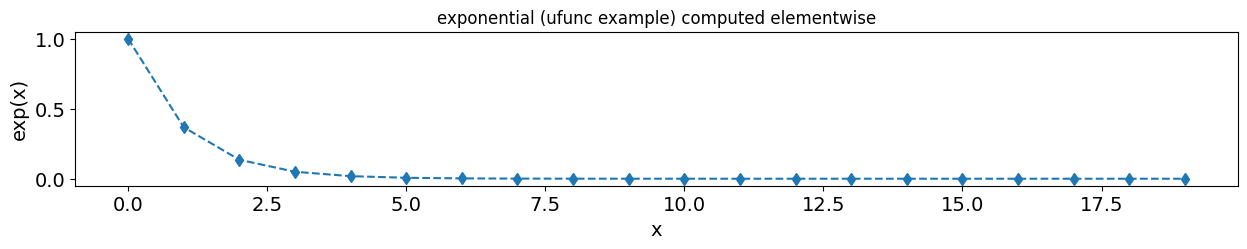

In [297]:
plt.figure(figsize=(15, 2))
plt.plot(x, y, 'd--')
plt.xlabel('x')
plt.ylabel('exp(x)')
plt.title('exponential (ufunc example) computed elementwise')
plt.show()
# TODO how to see even better that it's really exponential?


במהלך הקורס, תנסו לפתח הרגל לעשות ויזואליציה לכל דבר - אם יש ספק אין ספק

תיעזרו בכלי בינה מלאכותית לכתיבת קוד לצורך הספציפי הזה, אבל תוודאו שקראתם והבנתם כל שורה! -  אחרת, אתם עלולים לאכול פייק ניוז משכנע

בואו למשל נמחיש לעצמנו איך נראית מטריצה

C:\Users\alexf\AppData\Local\Temp\ipykernel_5588\197615118.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((0, 0), cols, rows, fill=True, color='lightblue', edgecolor='black', lw=2))


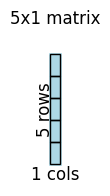

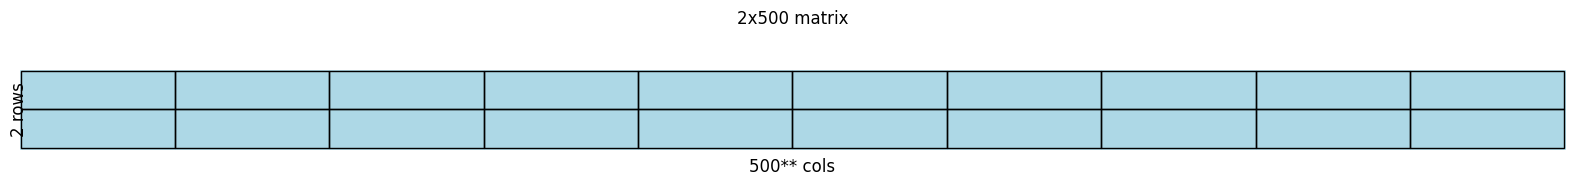

In [298]:
# TODO which parts of the function have been written by a human and whic by ChatGPT?

def plot_matrix_shape(shape, title=None, ax=None, figsize=(2, 2), max_cells=10):
    """Visualize a matrix with given shape (rows, cols),  
       
       if too much rows/columns, up to 10 are shown (with ** for warning)
    """    
    rows, cols = shape
    aspect_ratio = min(max(cols / rows, 0.1), 10) #  if rows > 0 else 1  # Adjust aspect ratio
    if ax==None:
        fig, ax = plt.subplots(figsize=(figsize[0] * aspect_ratio, figsize[1]))
    else:
        ax.set_aspect(aspect_ratio)

    # Draw the outer rectangle representing the matrix
    ax.add_patch(plt.Rectangle((0, 0), cols, rows, fill=True, color='lightblue', edgecolor='black', lw=2))

    # Draw individual cells up to 10 rows/cols
    rows2draw = min(rows, max_cells)
    cols2draw = min(cols, max_cells)
    for i in range(rows2draw):
        for j in range(cols2draw):
            ax.add_patch(plt.Rectangle((j*cols/cols2draw, rows/rows2draw*(rows2draw - i - 1)), cols/cols2draw, rows/rows2draw, fill=False)) #, hatch='/', edgecolor='black', lw=1))

    # Annotate the dimensions
    ax.text(cols / 2, -0.5*rows/rows2draw, f"{cols}{'**' if cols!=cols2draw else ''} cols", ha="center", va="center", fontsize=12, color="black")
    ax.text(-.5, rows / 2, f"{rows}{'**' if rows!=rows2draw else ''} rows" , ha="center", va="center", fontsize=12, color="black", rotation=90)
    
    plt.title(title or f'{shape[0]}x{shape[1]} matrix')
    # Adjust limits and remove axes
    ax.set_xlim(-1, cols + 1)
    ax.set_ylim(-1, rows + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")

plot_matrix_shape( (5,1) )
plot_matrix_shape( (2,500) )

### <div dir=rtl style="background-color: lightblue; color: red;  font-weight: bold"> שאלה 1</div>

<div dir=rtl style="background-color: lightblue; color: red; font-size: 16">
    ינאי החקלאי יצא אל המשתלה כדי לבחון מינים של אירוסים.  הוא בחן 150 פרחי אירוס מסומנים משלושה מינים שונים ועבורם מדד את אורך ורוחב עלי הגביע (sepal) ואת אורך ורוחב עלי הכותרת (petal).      
     ינון מעוניין להשתמש בנתונים בכדי לסווג פרחים חדשים שהוא ימצא בשדה לאחד מהמינים על-סמך המאפיינים שלהם. מכיוון שלא זכה להשתתף בקורס "מבוא למדעי הנתונים" הוא מתכנן אסטרגטגיה בסיסית בה עבור כל פרח שיימצא הוא ייחפש את דוגמא 
     .הדומה לו ביותר מתוך  "קבוצת הלימוד" שחקר במשתלה
</div>
מה לדעתכם יכולות להיות הבעיות בגישתו של ינאי?

<div dir=rtl style="background-color: lightblue; color: red;  font-weight: bold">    
    א. שרטטו דיאגרמת פיזור של הפרטים המתארת את אורך עלי הכותרת כתלות באורך עלי הגביע
</div>

In [299]:
from sklearn import datasets
iris = datasets.load_iris()
print(type(iris), type(iris.data))
print(iris.data.shape)
print(iris.feature_names)
iris.data[:3]

<class 'sklearn.utils._bunch.Bunch'> <class 'numpy.ndarray'>
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

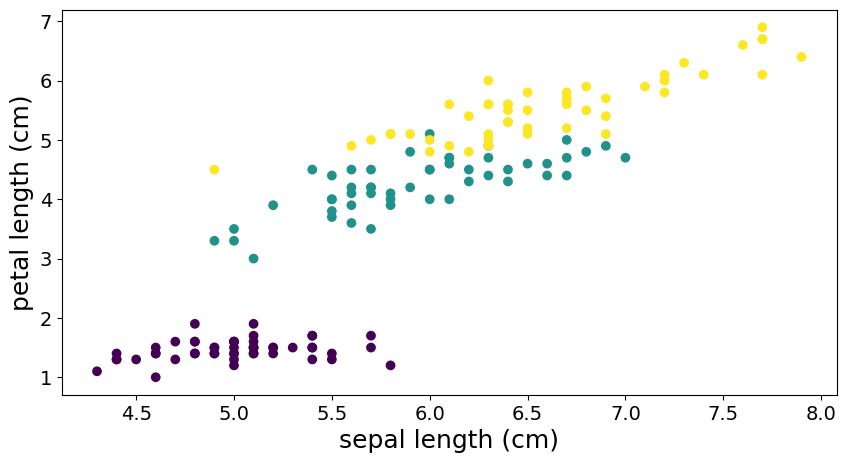

In [300]:
plt.figure(figsize=(10, 5))
# plot three variables of data with X, Y and Color:
plt.scatter(iris.data[:,0], iris.data[:,2], c=iris.target)

# TODO what's not nice about the code above?
# could we avoid the 'magic' indices "0", "2"? can we have named columns?

plt.xlabel(iris.feature_names[0], fontsize = 18)
plt.ylabel(iris.feature_names[2], fontsize = 18)
plt.show()

<div dir=rtl>
אפשר להשתמש בפונקציה rcparams על מנת לקבע את ברירת המחדל של העיצוב

https://matplotlib.org/stable/tutorials/introductory/customizing.html
</div>

In [301]:
params = {'figure.figsize': (12, 4),
          'axes.labelsize': 14,
          'xtick.labelsize':14,
          'ytick.labelsize':14}
plt.rcParams.update(params)

# Setting what's gonna happen when not giving fontsize=xx arg, not creating figure with plt.figure(), etc...

Text(0, 0.5, 'petal length (cm)')

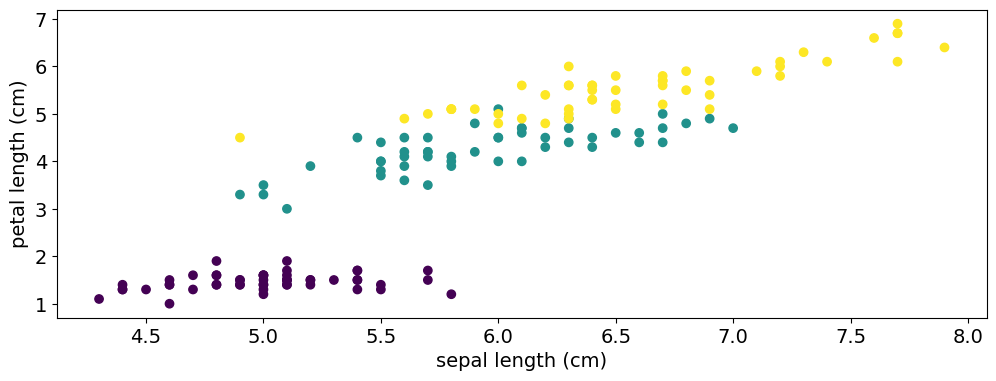

In [302]:
# What we do is plotting three variables (2 numerical, 1 categorical) using X, Y, color.
# TODO think: can we draw 3 numericals? 4?  5? 
plt.scatter(iris.data[:,0], iris.data[:,2], c=iris.target)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

<div dir=rtl style="background-color: lightblue; color: red;  font-weight: bold">
     ב. בדרכו חזרה הבייתה נתקל ינאי בשלושה פרחי אירוס בערוגה. מיד מדד אותם ורשם במחברת. כך:
</div>

| sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) |
|------|------|------|------|
| 6.0 | 5.5 | 1.2 | 0.9 |
| 6.2 | 0.5 | 2.3 | 9.0 |
| 7.0 | 3.0 | 7.0 | 3.1 |

<div dir=rtl style="background-color: lightblue; color: red;  font-weight: bold">
    שרטטו גם את שלוש המדידות על דיאגרמת הפיזור וחשבו לכל מדידה את מרחקה בדיאגרמה מכל אחת מהמדידות האחרות.
</div>

In [303]:
plant_measurements = np.array([
    [ 6.0 , 5.5 , 1.2 , 0.9 ],
    [ 6.2 , 0.5 , 2.3 , 9.0 ],
    [ 7.0 , 3.0 , 7.0 , 3.1 ]
]
)

# This is our first example of a FEATURE MATRIX! 
# rows:     instances
# columns:  parameters ("features")

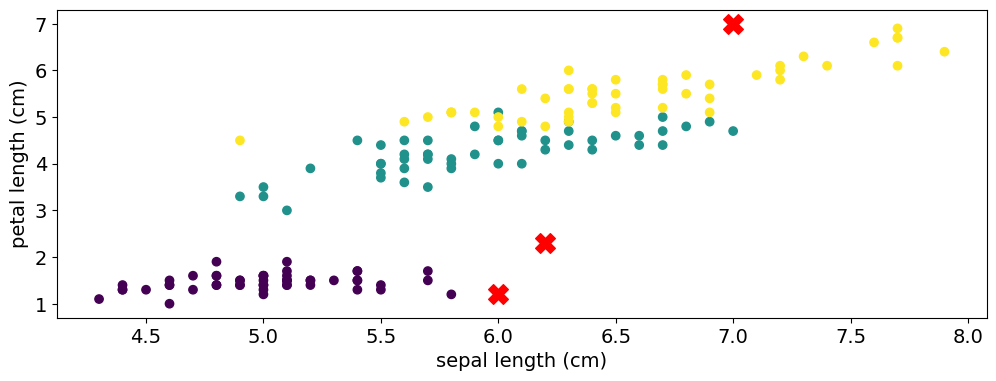

In [304]:
# Scatter plot in 2D space of two features is obtained by plotting one COLUMN of a feature matrix against another. 

plt.figure(figsize=(12,4))
plt.scatter(iris.data[:,0], iris.data[:,2], c=iris.target)
sepal_length_measurements = plant_measurements[:,0]
petal_length_measurements = plant_measurements[:,2]
# TODO how to get list of (sepal,petal) pairs out of two arrays? hint: zip()
plt.scatter(sepal_length_measurements, petal_length_measurements, marker='X', c='r', s=200)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()


<div dir=rtl>
    אנחנו מחשבים את המרחק כך:
</div>

$$ dist(x,y) = \sqrt{\sum_{d}^D{(x_d - y_d)^2 }} $$

<div dir=rtl>
    עבור מרחב בעל D מימדים. <br />

<div dir=rtl>
    פתרון "נאיבי" - שתי לולאות. <br />
    יקר חישובית אבל קל להבנה אינטואיטיבית:
    
</div>

In [305]:
def distance_two_loops(a, b):
    '''
    a:  numpy array [Na x 2]
    b:  numpy array [Nb x 2]
        
    returns:
        numpy array [NaxNb]
    '''    
    out = np.zeros((a.shape[0], b.shape[0]))
    
    for i_a in range(a.shape[0]):
        for i_b in range(b.shape[0]):            
            dist_sq = np.sum((a[i_a,:] - b[i_b,:])**2)
            # dist_sq = np.power((a[i_a,:] - b[i_b,:]), 2).sum()  # is it the same?
            out[i_a,i_b] = dist_sq
            
    return np.sqrt(out)  # elementwise

In [306]:
distances = distance_two_loops(iris.data[:,[0,2]], plant_measurements[:,[0,2]])
distances.shape, distances[:5,:]


((150, 3),
 array([[0.92195445, 1.42126704, 5.91354378],
        [1.11803399, 1.58113883, 5.98080262],
        [1.30384048, 1.80277564, 6.14654374],
        [1.43178211, 1.78885438, 6.00083328],
        [1.0198039 , 1.5       , 5.9464275 ]]))

<div dir=rtl>
    פתרנו את השאלה. נבדוק כמה זמן לוקח לפונקציה לרוץ.
    
</div>

In [307]:
%timeit distance_two_loops(iris.data[:,[0,2]], plant_measurements[:,[0,2]])

3.51 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<div dir=rtl>

לכאורה לא הרבה זמן אבל מה היה קורה אם היה לנו אלף רשומות בדאטאסט? מליון?

    לרוב יהיו לנו הרבה יותר רשומות לעבוד איתן ולכן תמיד ננסה לממש פיתרון בעזרת ויקטריזציה 
 נרצה לפתור את המשוואה ישירות עם נאמפיי. 
 
 במקרה הזה נצטרך לבצע מניפולציה על המערכים על מנת שנוכל להפעיל עליהם פעולת חיסור אחת בעזרת נאמפיי.  

 כדי להתמודד עם האתגר, נלמד על נושא הרחבת מימדים בנאמפיי 

 
</div>

C:\Users\alexf\AppData\Local\Temp\ipykernel_5588\197615118.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((0, 0), cols, rows, fill=True, color='lightblue', edgecolor='black', lw=2))


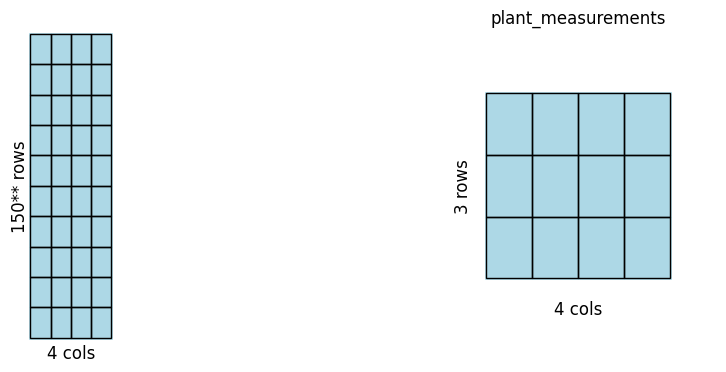

In [308]:
fig, axes = plt.subplots(1,2)
plot_matrix_shape(iris.data.shape, ax=axes[0], title='iris.data')
plot_matrix_shape(plant_measurements.shape, ax=axes[1],  title='plant_measurements')


In [309]:
# H O M E   P R A C T I C E

# BROADCASTING Sandbox (A) - what cases work on their own?

# TODO read about broadcasting: 
#      https://numpy.org/doc/stable/user/basics.broadcasting.html
# TODO understand how the code works. 
#   Note how we write automated tests that go over test cases - list that can be grown 
#   Try to add more complex shape combinations, see that you understand what works.

for shape1, shape2 in [((5, 3), (2, 5, 3)),  
                       ((2, 5), (2, 5, 3)),
                       ((2, 5, 1), (2, 5, 3))]:
    try:
        a, b = np.random.randn(*shape1), np.random.randn(*shape2)
        print(a.shape, b.shape, (a + b).shape)
    except:
        print(a.shape, b.shape, " a+b failed")

# TODO what to do in the failed cases?

(5, 3) (2, 5, 3) (2, 5, 3)
(2, 5) (2, 5, 3)  a+b failed
(2, 5, 1) (2, 5, 3) (2, 5, 3)


<div dir=rtl>
ברודקסטינג הוא כמו קסטינג - שינוי משתנה\ים על הדרך כדי שהאופרציה תהיה מוגדרת, במקרה זה צורה ולא דאטאטייפ של אלמנט

מסקנה:  נאמפיי עושה מאמץ מירבי לפרש את הכוונות שלנו עפ סט חוקים סדור , 
לפעמים צריך (או לפחות רצוי) לעזור לו על-ידי הוספת מימדי דמי, בכדי שמספר המימדים יהיה זהה 



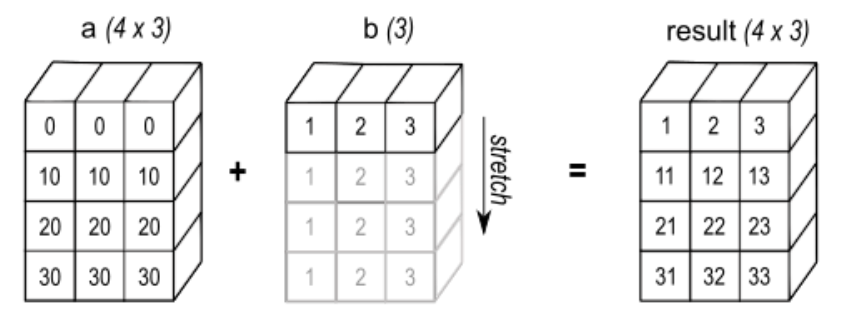

לפעמים הפער בצורות גדול מידיי וצריך הכוונה כדי שיידע לאן להרחיב איך לתאם


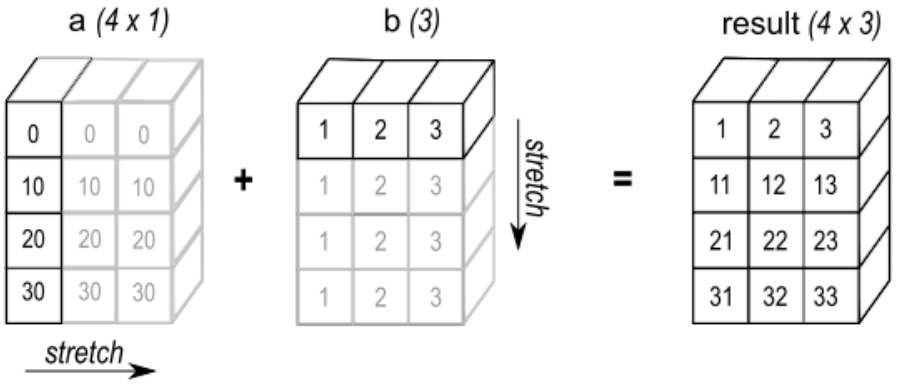
</div>

In [310]:
# H O M E   P R A C T I CE

# # BROADCASTING Sandbox (B) - helping numpy figure out what we want by aligning shapes for broadcasting.
#                              we align shapes by adding dummy axes/dimensions"
# TODO play with what works by adding more complex cases till complete grasp

a, b = np.ones(3), np.arange(3) 
print("A: ", a.shape, b.shape, '\n', a+b)

a, b = np.ones((3,1)), np.arange(3)[:, None]
print("B: ", a.shape, b.shape, '\n', a+b)

a, b = np.ones((1,3)), np.arange(3)[None, :]
print("C: ", a.shape, b.shape, '\n', a+b)

a, b = np.ones((1,3)), np.arange(3)[:, None]
print("D: ", a.shape, b.shape, '\n', a+b)


A:  (3,) (3,) 
 [1. 2. 3.]
B:  (3, 1) (3, 1) 
 [[1.]
 [2.]
 [3.]]
C:  (1, 3) (1, 3) 
 [[1. 2. 3.]]
D:  (1, 3) (3, 1) 
 [[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


<div dir=rtl>
בחזרה לתרגיל שלנו.

נרחיב כל מטריצה באמצעות הוספת מימד במקום הנכון כך שנוכל לבצע את פעולת החיסור בין המטריצות:   

הרחבת מימד כלומר הוספת מימד באורך 1, למשל:

 וקטור --> מטריצה של שורה\עמודה בודדת, 

או מטריצה --> תיבה עם פרוסה בודדת
</div>

In [311]:
# ! creating dummy axis at 1 
print(iris.data[:, [0,2]].shape)
print(iris.data[:, None, [0,2]].shape) 
#print(iris.data[:,  np.newaxis, [0,2]].shape)  # equivalent syntax
print(iris.data[:3, None, [0,2]])
# TODO look closely at the brackets.

(150, 2)
(150, 1, 2)
[[[5.1 1.4]]

 [[4.9 1.4]]

 [[4.7 1.3]]]


In [312]:
# ! creating dummy axis at 0
print(plant_measurements[np.newaxis, :, [0,2]].shape)
print(plant_measurements[np.newaxis, :, [0,2]])

(1, 3, 2)
[[[6.  1.2]
  [6.2 2.3]
  [7.  7. ]]]


In [313]:
# ! one-liner to create a (N x n x 2) tensor of dx,dy for all (o: 1..N=150, X: 1..n=3) pairs
#   aka (N x n) matrix of  len-2 (x,y) vectors
sub = iris.data[:, None, [0,2]] - plant_measurements[None, :, [0,2]]
sub.shape

(150, 3, 2)





<div dir=rtl>
   האופרטורים של  תמיד יחפשו דרך שבה ניתן להביא את שני האופרנדים לאותו סט מימדים ע"י פעולות "מתבקשות" כמו שכפול  ("שידור רחב")  לאורך הציר התואם. 
   
   https://numpy.org/doc/stable/user/basics.broadcasting.html
   
   כן צריך לעזור למנגנון להבין מהם הצירים התואמים, ואת זה עשינו קודם

   shapes: arr(shape=(X, 1, 2)) + arr(shape=(1, Y, 2)) --> arr(shape=(X, Y, 2))
    
    כל שנותר הוא להעלות בריבוע את ההפרש בכל ציר,
     לסכום על הצירים כלומר על המימד השלישי ולהוציא שורש.


In [314]:
def distance_no_loops(a, b):
    '''           
    a: numpy array [Na x 2]
    b: numpy array [Nb x 2]
    
    returns:
        pairwise distance matrix in 2D space, as a numpy array [Na x Nb]
    '''
    # Using intermediary tensor: (N x n) matrix of (x,y) len-2 vectors    
    a_3d_stretched = a[:, None, :]                                   # Na x 1  x 2(x,y)
    b_3d_stretched = b[None, :, :]                                   # 1  x Nb x 2(x,y)
    squared_xy_deltas_mat_3d = (a_3d_stretched - b_3d_stretched)**2  # Na x Nb x 2(x,y)
    squared_distances = squared_xy_deltas_mat_3d.sum(axis=2)         # Na x Nb
    return np.sqrt(squared_distances)
     

In [315]:
distances = distance_no_loops(iris.data[:,[0,2]], plant_measurements[:,[0,2]])
print(distances[:5,:])

[[0.92195445 1.42126704 5.91354378]
 [1.11803399 1.58113883 5.98080262]
 [1.30384048 1.80277564 6.14654374]
 [1.43178211 1.78885438 6.00083328]
 [1.0198039  1.5        5.9464275 ]]


In [316]:
%timeit distance_no_loops(iris.data[:,[0,2]], plant_measurements[:,[0,2]])
# x100 !

34.7 µs ± 3.02 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<div dir=rtl style="background-color: lightblue; color: red; font-weight: bold">
    ג. מצאו את נקודת המדידה הקרובה ביותר מהשדה לכל אחד משלושת האירוסים בערוגה.
</div>

In [317]:
print('distances.shape: ', distances.shape)
minimum_dists_points_index = distances.argmin(axis=0)
minimum_dists_points_index  # between 0 and 150

distances.shape:  (150, 3)


array([ 14,  18, 118], dtype=int64)

In [318]:
# NOTE numpy indexing using a variable - index array
closest_points = iris.data[minimum_dists_points_index, :]
closest_points

array([[5.8, 4. , 1.2, 0.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3]])

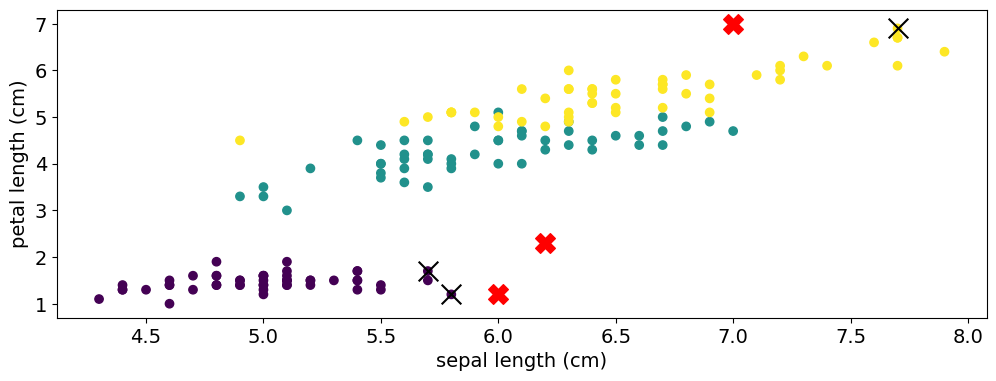

In [319]:
plt.figure(figsize=(12, 4))
plt.scatter(iris.data[:,0], iris.data[:,2], c=iris.target)
plt.scatter(plant_measurements[:,0], plant_measurements[:,2], marker='X', c='r', s=200)
plt.scatter(closest_points[:,0], closest_points[:, 2], marker='x', c='k', s=200)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()
# TODO think does it look a bit weird for one of the points?  WHY
#       maybe gotta modify visualizaation?  maybe gotta modify distance metric? 

# <div dir=rtl> Pandas </div>
<div dir=rtl>
    פנדס היא חבילה לdata science המיועדת לעבודה אופטימלית עם מידע טבלאי.  פנדס יעילה במיוחד בפעולות על מסדי נתונים בגדלים בינוניים (גיגות עד עשרות גיגות).
    
     פנדס נבנתה סביב נאמפיי לכן כל הכלים הקיימים בנאמפיי נמצאים בצורה מקבילה בפנדס וכמובן ישנם עוד הרבה כלים נוספים.
</div>

In [320]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [321]:
import pandas as pd

<div dir=rtl>
    הערה: הסיומת as pd היא לנוחות בלבד. <br />
    לפנדס שני אובייקטים עיקריים: Series ו DataFrame. האובייקט Series מייצג ווקטור של ערכים וDataFrame מטריצה.
</div>

In [322]:
v = pd.Series(['a','b',10,'d'])
v

0     a
1     b
2    10
3     d
dtype: object

<div dir=rtl>
    נשים לב לשני דברים: לצד הערכים שהכנסנו יש אינדקס רץ. לכל ערך יש אינדקס. בסוף הווקטור מצוין מה ה dtype שלו.
</div>

In [323]:
df = pd.DataFrame([
    ['a','b','c','d'],
    ['A','B','C','D'],
    ['alpha','beta','gamma','delta']
])

df

,0,1,2,3
0,a,b,c,d
1,A,B,C,D
2,alpha,beta,gamma,delta


<div dir=rtl>
    פנדס מאפשר מתן שמות הן לעמודות והן לאינדקסים.
</div>

In [324]:
df = pd.DataFrame([
        ['Sharp object accident', pd.Timestamp('12:15').time(), 36.5,75],
        ['Burns', pd.Timestamp('04:53').time(), 38.1,32],
        ['Anemia', pd.Timestamp('13:54').time(), 37.0,80]
    ],
    columns=['Cause of illness', 'Time of admission', 'Temp (c)', 'Weight (kg)'],
    index=['Luke', 'Gollum', 'Irony Man']
)

df
# NOTE:  remember how we asked if we can have a numpy array with meaningful anmes for cloumns/rows?  inside the object not just as separate ones..

,Cause of illness,Time of admission,Temp (c),Weight (kg)
Luke,Sharp object accident,12:15:00,36.5,75
Gollum,Burns,04:53:00,38.1,32
Irony Man,Anemia,13:54:00,37.0,80


In [325]:
df['Temp (c)']
# df['Luke']

Luke         36.5
Gollum       38.1
Irony Man    37.0
Name: Temp (c), dtype: float64

<div dir=rtl>
    ,אינדקסינג בפנדס מתאפשר בעיקר בזכות הפונקציה .loc <br />
      הפונקציה מקבלת לייבל של אינדקס ועמודה או מערך בוליאני

</div>

https://towardsdatascience.com/conditional-selection-and-assignment-with-loc-in-pandas-2a5d17c7765b


In [326]:
df.loc['Luke']

Cause of illness     Sharp object accident
Time of admission                 12:15:00
Temp (c)                              36.5
Weight (kg)                             75
Name: Luke, dtype: object

In [327]:
# also possible to find just by running number with iloc
df.iloc[2]

Cause of illness       Anemia
Time of admission    13:54:00
Temp (c)                 37.0
Weight (kg)                80
Name: Irony Man, dtype: object

In [328]:
df.loc[:,'Temp (c)']

Luke         36.5
Gollum       38.1
Irony Man    37.0
Name: Temp (c), dtype: float64

In [329]:
df.loc[df.index!='Luke']


,Cause of illness,Time of admission,Temp (c),Weight (kg)
Gollum,Burns,04:53:00,38.1,32
Irony Man,Anemia,13:54:00,37.0,80


In [330]:
df.loc[df['Temp (c)']>=37]


,Cause of illness,Time of admission,Temp (c),Weight (kg)
Gollum,Burns,04:53:00,38.1,32
Irony Man,Anemia,13:54:00,37.0,80


<div dir=rtl>
   לא ניתן לפנות באמצעות loc לאינדקסים נומריים  <br />
      

</div>

<div dir=rtl>
   אבל כן אפשר לפנות לאינדקסים נומריים באמצעות iloc  <br />
      

</div>

In [331]:
#df.loc[0,3]
df.iloc[0,3]


75

<div dir=rtl>
    יכולת חשובה של פנדס היא היכולת לקרוא ולכתוב אובייקטים לקבצים. <br />
    יש המון סוגי קבצים נתמכים, בניהם:
</div>

 - Excel
 - JSON
 - Pickle
 - SQL
 - CSV
 - ...
 
https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

<div dir=rtl>
    נקח את CSV כדוגמה. הסיומת CSV, או comma separated values, מציינת קובץ טקסט המכיל מידע טבלאי. הפורמט הוא פורמט פתוח - לכן זמין לתצוגה בשלל של תוכנות (כולל כתבן ואקסל) - הוא נוח לקריאה אנושית גם בצורה הטקסטואלית שלו ונוח לכתיבה אנושית בפורמט הטקסטואלי שלו. החסרונות - אין שום דחיסה של המידע, עיצוב של התאים השונים לא נשמר בתוך הקובץ לכן יעלם אחרי טעינה מחדש, זמני הכתיבה והקריאה של קבצים מהסוג הזה יחסית ארוכים ומידע נשמר אך ורק בפורמט טקסט. <br />
    נדגים: <br />
    הטבלה למעלה בפורמט CSV בכתבן תהיה
</div>


<div dir=rtl>
    ובאקסל היא תיראה כך:
</div>

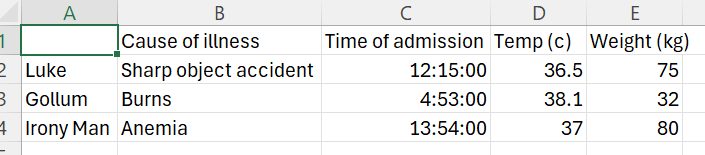

In [334]:
df.to_csv('2.df.csv')

פאנדאס מאפשר לכתוב וכמובן גם לקרוא קבצים טבלאיים, מה שמאפשר תקשורת קלה בין פייתון לאקסל

In [335]:
df2 = pd.read_csv('2.df.csv', index_col=0)
df2

,Cause of illness,Time of admission,Temp (c),Weight (kg)
Luke,Sharp object accident,12:15:00,36.5,75
Gollum,Burns,04:53:00,38.1,32
Irony Man,Anemia,13:54:00,37.0,80
